In [2]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf #binds pandas and plotly together
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
heart=pd.read_csv(r'C:\Users\heyit\Downloads\Heart-Disease-Prediction-master\heart.csv')

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [11]:
heart.shape

(303, 14)

In [12]:
heart.size

4242

In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


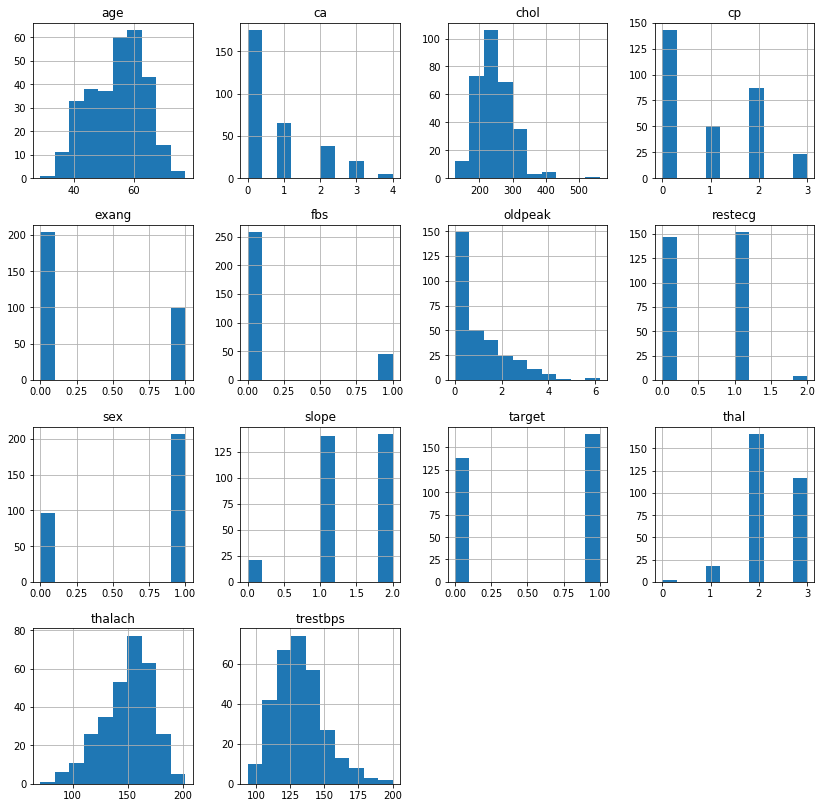

In [15]:
heart.hist(figsize=(14,14))
plt.show()

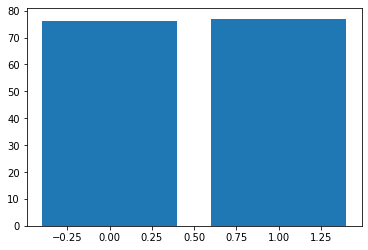

In [16]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

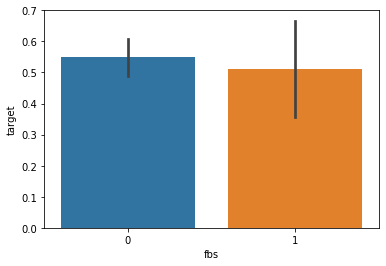

In [17]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

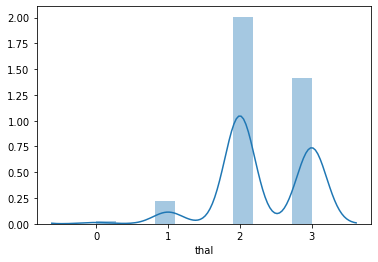

In [18]:
sns.distplot(heart["thal"])


C:\Users\heyit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\heyit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



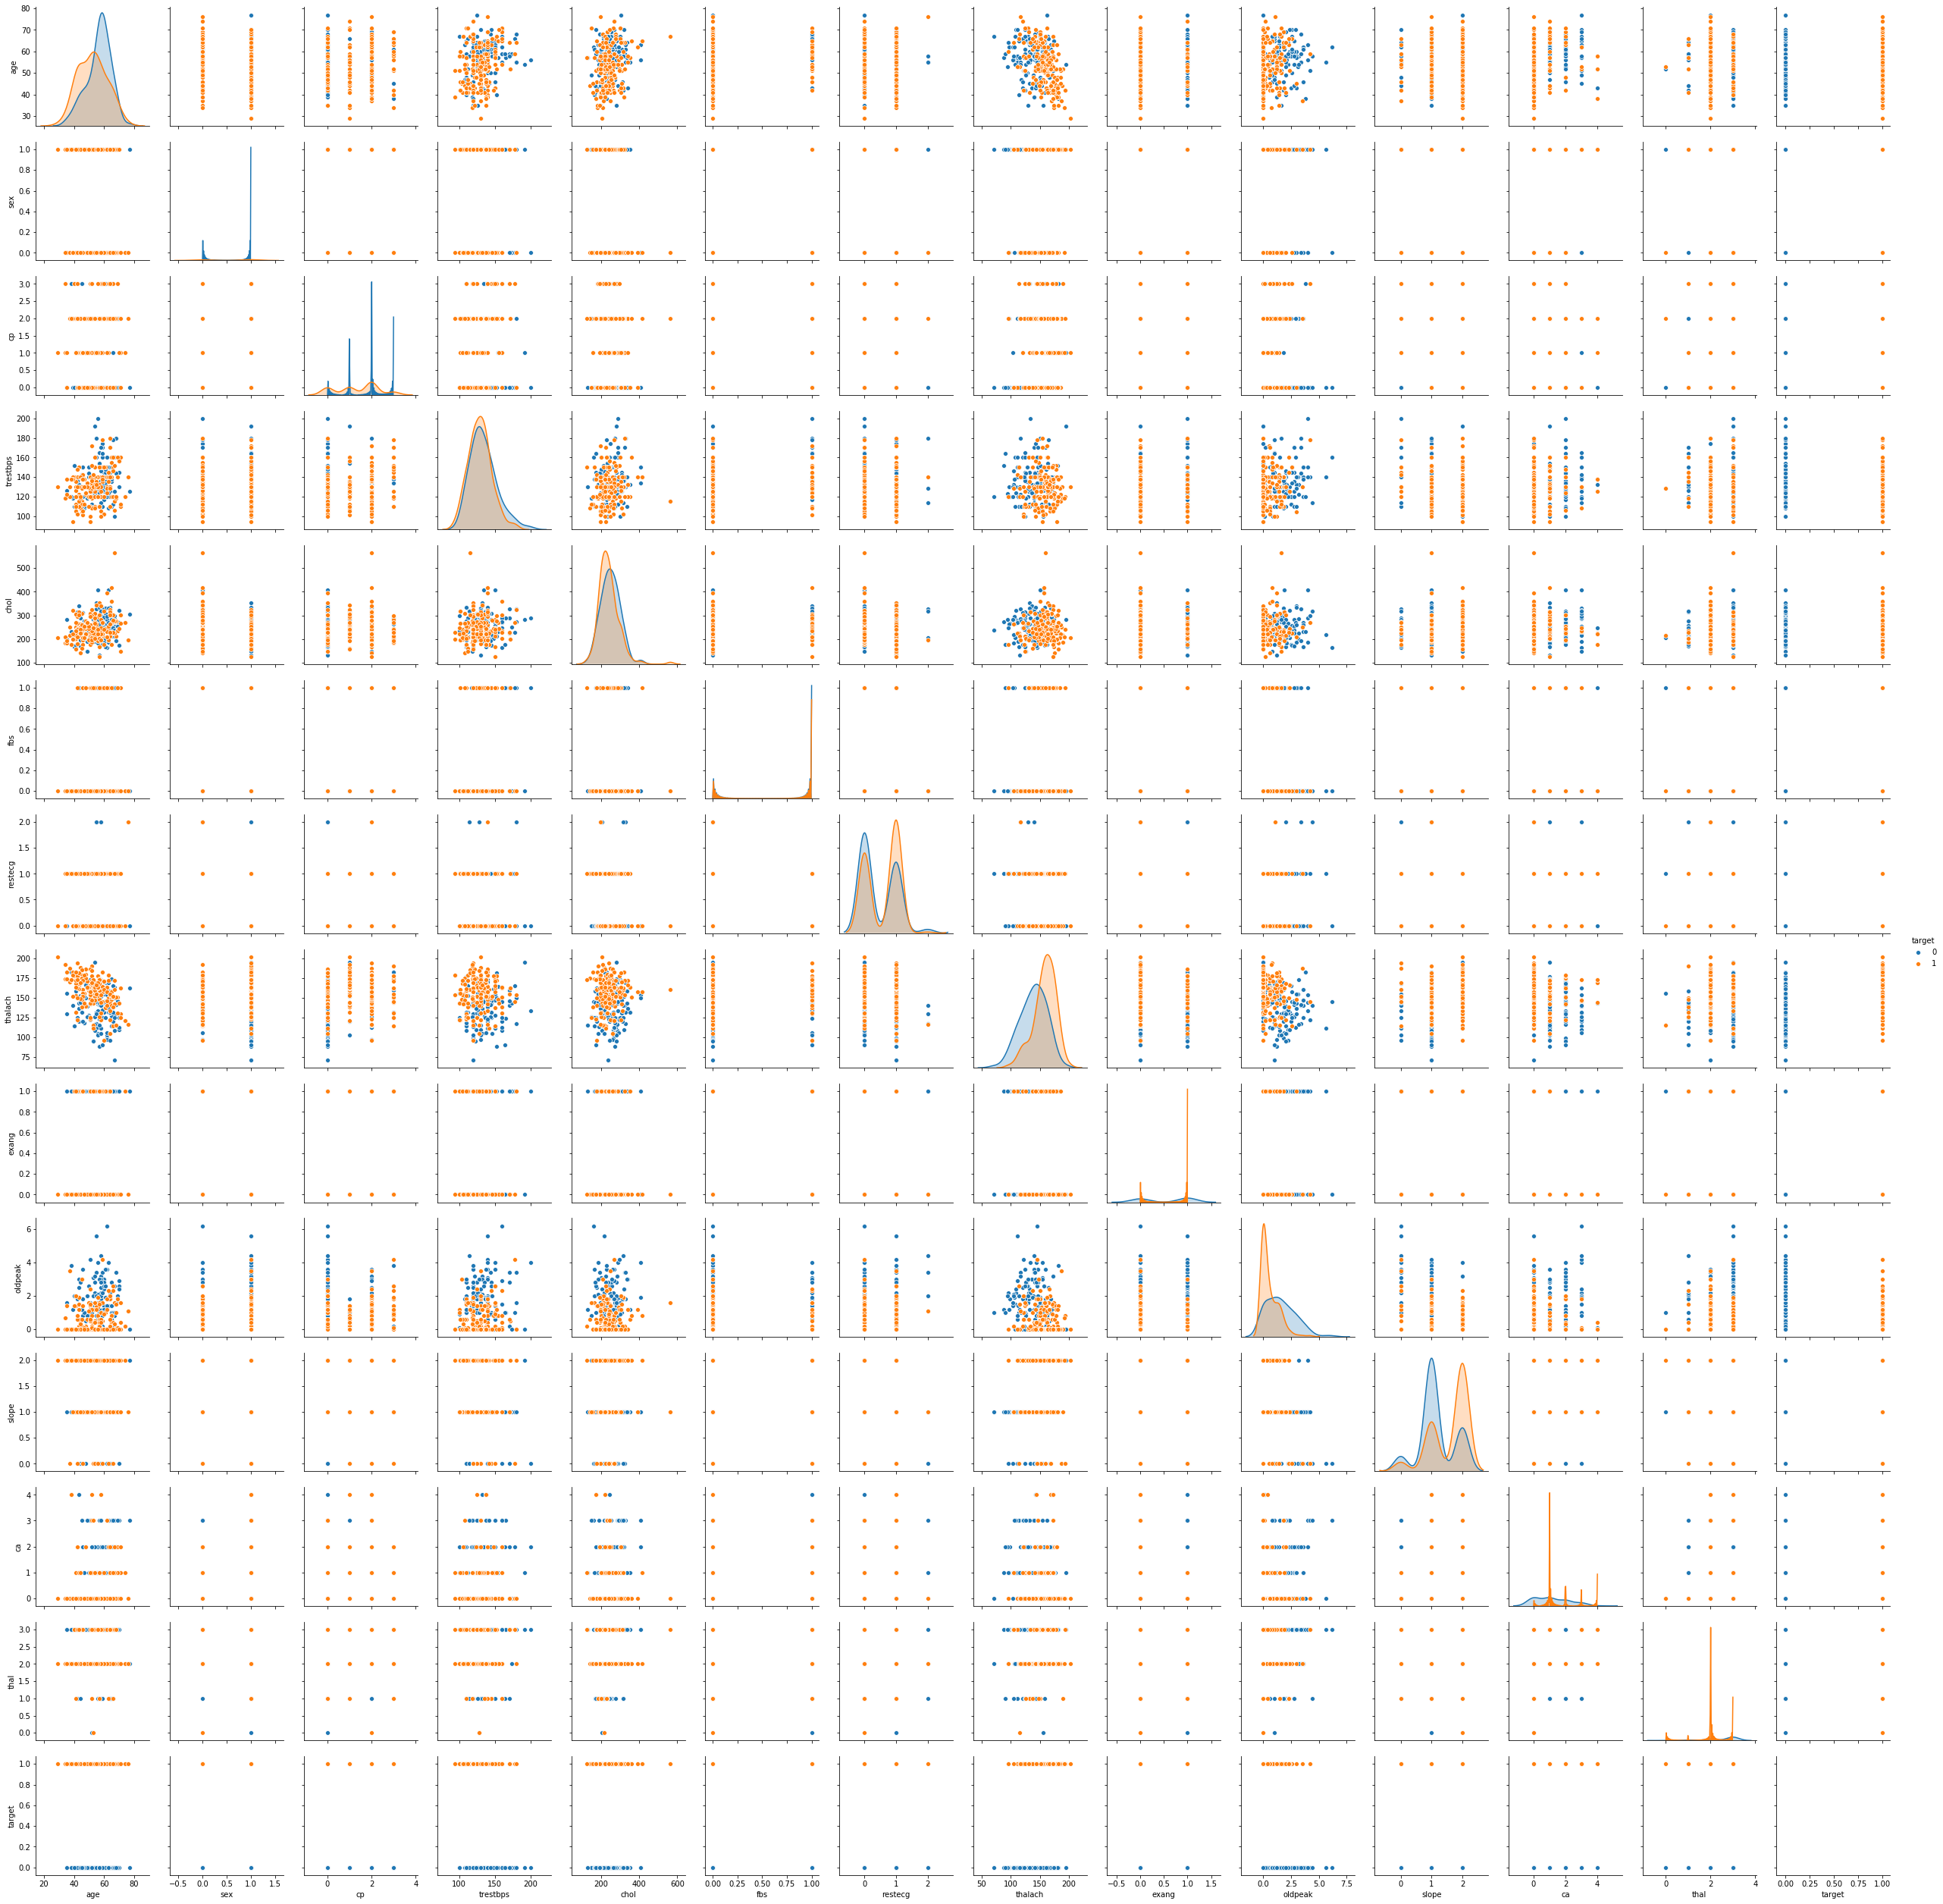

In [19]:
sns.pairplot(heart,hue='target')


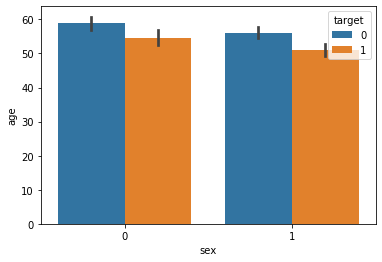

In [20]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])
plt.show()

In [21]:
px.bar(heart,heart['sex'],heart['target'])

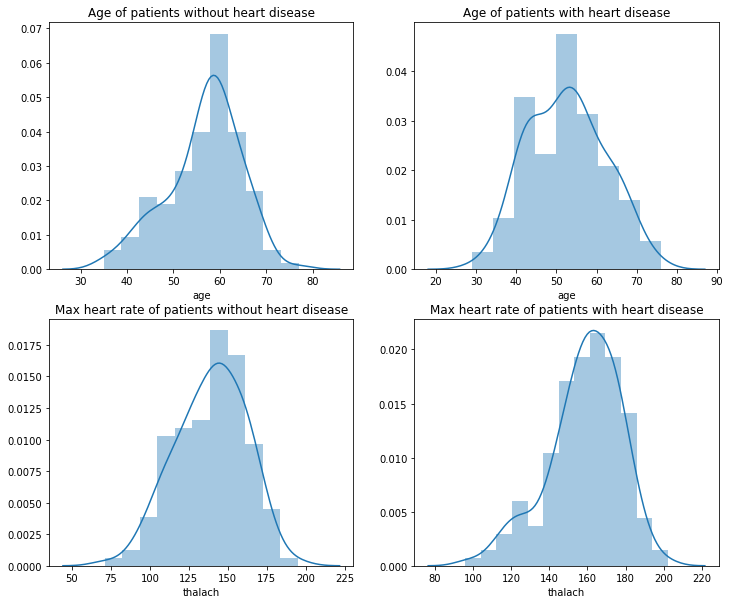

In [22]:
# distplots
plt.figure(figsize=(12,10)) #x=12 y=10
plt.subplot(221) #2*2 grid 1st subplot
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222) #2*2 grid 2nd subplot
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [23]:
#Data Preprocessing


In [24]:
X,y=heart.loc[:,:'thal'],heart.loc[:,'target']

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [61]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
X.size

3939

In [28]:
from sklearn.model_selection import train_test_split


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [31]:
X_train.shape

(212, 13)

In [32]:
X_test.shape

(91, 13)

In [33]:
y_test.shape

(91,)

In [35]:
y_train.shape

(212,)

In [38]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
#Decision tree classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt.fit(X_train,y_train) #do the training now

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
# nOw prediction on x_test

In [51]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [52]:
accuracy_dt

76.92307692307693

In [53]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.769


In [54]:
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [55]:
#which feature is most important to predict whether you have heart disease or not

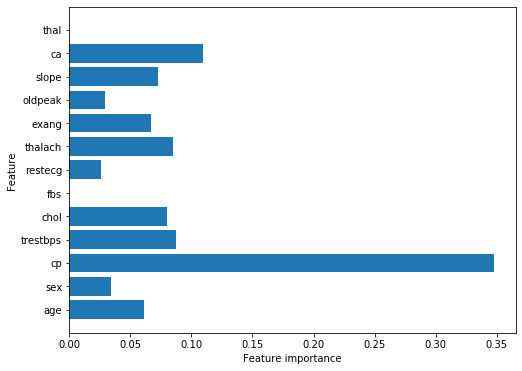

In [60]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [64]:
Catagory=['No you dont have Heart Disease','Yes you have Heart Disease']


In [ ]:
# Applying KNN


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [79]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100


In [80]:
accuracy_knn

65.93406593406593

In [81]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))


Accuracy on training set: 0.769
Accuracy on test set: 0.659


In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [87]:
X_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [88]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn_std=sc.transform(X_knn)#transforming data
X_knn_prediction=dt.predict(X_knn)

In [91]:
X_knn_std


array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [92]:
(X_knn_prediction[0])


1

In [93]:
print(Catagory[int(X_knn_prediction[0])])


Yes you have Heart Disease


In [94]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) #neighbours from 1 to 26
    knn.fit(X_train_std,y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [95]:
scores #nrighbours and their accuracy scores


{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

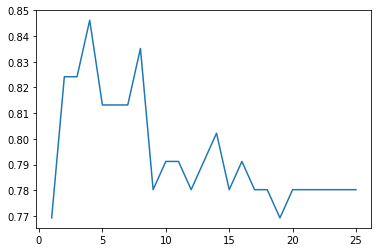

In [96]:
plt.plot(k_range,scores_list)


In [97]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

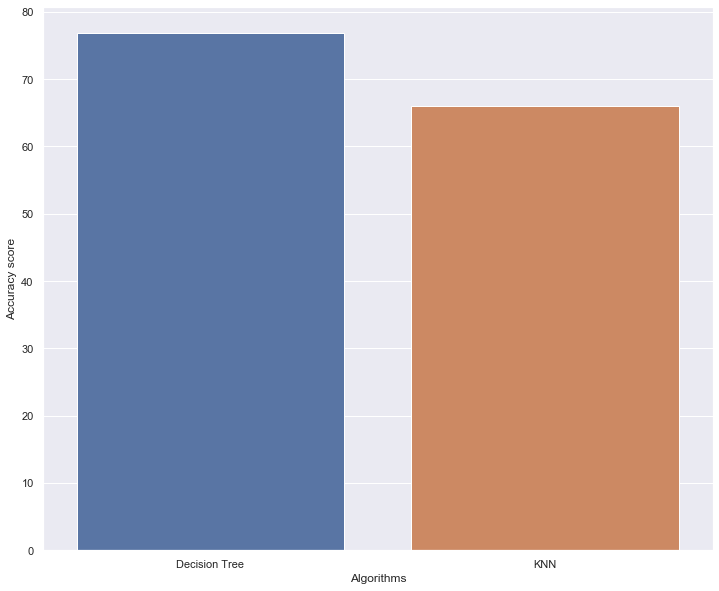

In [101]:
sns.set(rc={'figure.figsize':(12,10)})
#plt.figure(figsize(12,10))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

<BarContainer object of 2 artists>

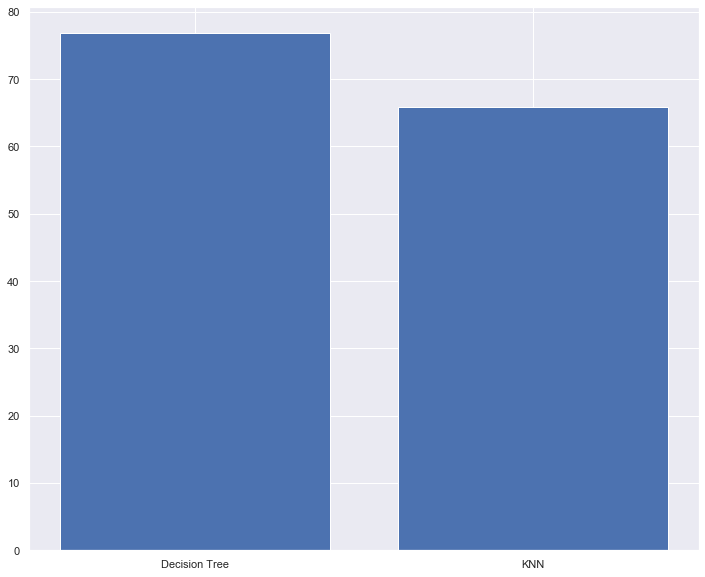

In [104]:
plt.bar(algorithms,scores)